/tmp/ipykernel_6850/3617629196.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


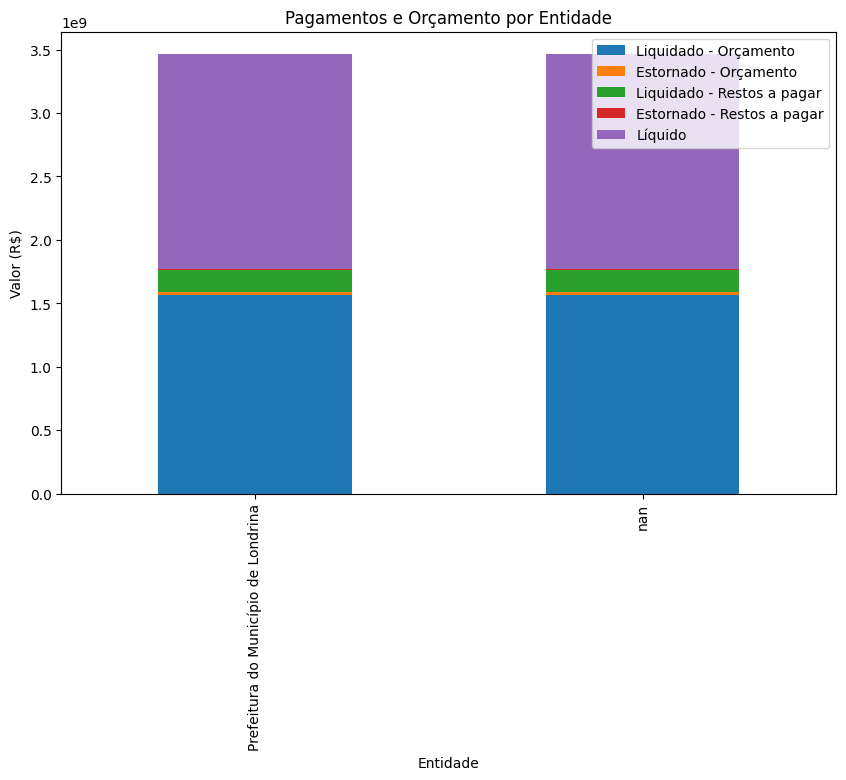

Total Liquidado: R$3,395,644,129
Total Orçamento: R$3,181,436,409
Total Restos a Pagar: R$358,494,326


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
contrato_pag_df = pd.read_csv('ContratoPag.csv', encoding='latin1', sep=';')

# 1. Conversão de Dados
colunas_monetarias_contrato = ['Liquidado - Orçamento', 'Estornado - Orçamento', 'Liquidado - Restos a pagar', 'Estornado - Restos a pagar', 'Líquido']

# Remove pontos e substitui vírgulas por ponto, em seguida, converte para float
contrato_pag_df[colunas_monetarias_contrato] = contrato_pag_df[colunas_monetarias_contrato].replace('[^\d\.,]', '', regex=True).apply(lambda x: x.str.replace('.', '').str.replace(',', '.')).astype(float)

# 2. Ajuste para apresentar números no formato desejado
pd.options.display.float_format = '{:,.0f}'.format

# 3. Análise Exploratória
total_liquidado = contrato_pag_df['Líquido'].sum()
total_orcamento_contrato = contrato_pag_df['Liquidado - Orçamento'].sum() + contrato_pag_df['Estornado - Orçamento'].sum()
total_restos_a_pagar_contrato = contrato_pag_df['Liquidado - Restos a pagar'].sum() + contrato_pag_df['Estornado - Restos a pagar'].sum()

# Visualização Gráfica
contrato_pag_df.plot(kind='bar', x='Entidade', y=colunas_monetarias_contrato, stacked=True, figsize=(10, 6))
plt.title('Pagamentos e Orçamento por Entidade')
plt.ylabel('Valor (R$)')
plt.show()

# Exibir Totais
print(f'Total Liquidado: R${total_liquidado:,.0f}')
print(f'Total Orçamento: R${total_orcamento_contrato:,.0f}')
print(f'Total Restos a Pagar: R${total_restos_a_pagar_contrato:,.0f}')

In [3]:
areas_gastos = contrato_pag_df.groupby('Entidade')['Líquido'].sum()
areas_gastos_percentual = (areas_gastos / areas_gastos.sum()) * 100
areas_gastos_percentual = areas_gastos_percentual.sort_values(ascending=False)

print('\nDistribuição dos Gastos por Entidade:')
for entidade, percentual in areas_gastos_percentual.items():
    print(f'{entidade}: {percentual:.2f}% do total gasto')


Distribuição dos Gastos por Entidade:
Prefeitura do Município de Londrina: 100.00% do total gasto
